In [3]:
# Import all the libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [26]:
import cv2
data = []
labels = []
# Dictionary to map the numerals in different language with the output labels
Devnagari = {"0":0,"1":10,"2":2,"3":3,"4":11,"5":12,"6":13,"7":14,"8":15,"9":9}
Western_Arabic = {"0":16,"1":1,"2":17,"3":18,"4":19,"5":20,"6":21,"7":22,"8":23,"9":9}
f = open("/Users/Rutvik/Desktop/ML Project/Code/Data/Subsets/DAT_Representation/dataset_final.dat", "rb+")
dataset = pickle.load(f)
for i in range(len(dataset[0])):
    image = dataset[0][i]
    number = np.argmax(dataset[1][i])
    data.append(image)
    labels.append(number)

In [27]:
#split the dataset into train and test sets
X_train,X_test,y_train,y_test = train_test_split(data,labels, test_size = 0.2, random_state = 1)

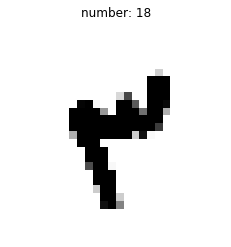

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3],cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('number: ' + str(y_train[3]))
None

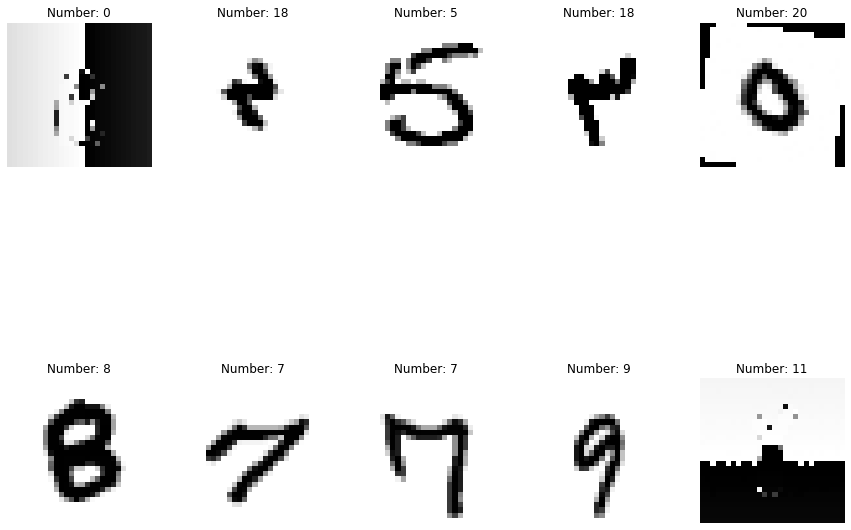

In [7]:
figures, axes = plt.subplots(2,5, figsize = (15,12))

for ax,image,number in zip(axes.ravel(),X_train, y_train):
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.axis('off')
    ax.set_title('Number: ' + str(number))

/Users/Rutvik/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'label')]

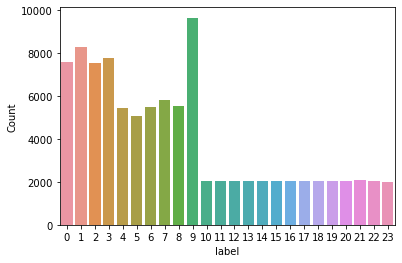

In [8]:
import seaborn as sns
p = sns.countplot(y_train)
p.set( xlabel = "label", ylabel = "Count")

In [9]:
X_train = np.array(X_train)
X_test = np.array(X_test)
n_samples,nx,ny = X_train.shape
n_samples_test,nx_test,ny_test = X_test.shape
X_train = X_train.reshape((n_samples,nx*ny))
X_test_ = X_test.reshape((n_samples_test,nx_test*ny_test))
X_train.shape
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn.predict(X_test_)

y_pred

array([ 5,  9, 22, ...,  2,  9,  3])

In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1873
           1       0.84      0.98      0.91      2131
           2       0.88      0.90      0.89      2016
           3       0.92      0.88      0.90      1916
           4       0.97      0.97      0.97      1358
           5       0.96      0.97      0.96      1233
           6       0.97      0.98      0.98      1399
           7       0.96      0.97      0.96      1478
           8       0.98      0.93      0.95      1293
           9       0.80      0.87      0.84      2402
          10       0.55      0.47      0.51       510
          11       0.79      0.64      0.71       485
          12       0.76      0.56      0.65       484
          13       0.78      0.65      0.71       516
          14       0.84      0.75      0.79       510
          15       0.77      0.86      0.82       487
          16       0.65      0.92      0.76       494
          17       0.68    

In [12]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[1701    2    4    1    0    0    2    0    1    9    1    3    2    2
     5    4   24    0    3    0  102    1    1    5]
 [   2 2091    5    2    0    1    0    2    0    2    2    0    0    0
     0    0   12    0    0    0    0   11    1    0]
 [  15   27 1818   22    0    0    2   20    1   41   11    2    5    6
     3    3    2    9    2    6    6   11    1    3]
 [   7   51   49 1680    0   22    1    9    7   22   21    7    1    2
     3    1   10    0    2   10    2    7    2    0]
 [   2    7    1    0 1311    0    2    3    0   27    0    1    0    0
     1    0    0    0    0    0    0    0    1    2]
 [   8    1    0   14    3 1196    6    0    0    5    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   7    3    0    0    2    7 1378    0    0    0    0    0    0    0
     0    2    0    0    0    0    0    0    0    0]
 [   2   19    3    0    3    0    0 1431    0   16    0    0    0    0
     0    0    1    0    0    0    0    2    0    1]


Text(0.5, 1, 'confusion matrix for MNIST dataset')

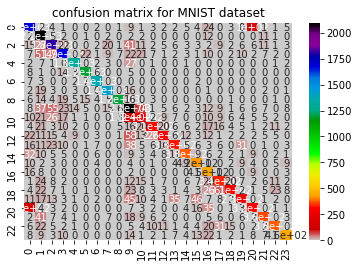

In [13]:
import seaborn as sns
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r')
s.set_title('confusion matrix for MNIST dataset')

In [14]:
acc = knn.score(X_test_,y_test)
print(f'accuracy from knn.score= {acc:.4}')

accuracy from knn.score= 0.8586


In [15]:
acc = metrics.accuracy_score(y_test, y_pred)
print(f'accuracy from metrics.accuracy= {acc:.4}')

accuracy from metrics.accuracy= 0.8586


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_train.shape

(96768, 784)

In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test_)

y_pred

array([11, 11,  0, ...,  3, 12,  3])

In [23]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.99      0.67       980
           1       1.00      0.89      0.94      1135
           2       0.94      0.85      0.89      1032
           3       0.95      0.74      0.83      1010
           4       0.99      0.57      0.72       982
           5       0.98      0.60      0.75       892
           6       0.96      0.88      0.92       958
           7       0.96      0.84      0.90      1028
           8       0.57      0.89      0.69       974
           9       0.85      0.77      0.81      1009

    accuracy                           0.80     10000
   macro avg       0.87      0.80      0.81     10000
weighted avg       0.87      0.80      0.81     10000



In [27]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [7,11,13]
        }
    }
}

In [28]:
from sklearn.model_selection import GridSearchCV
scores = []
X_train = X_train[:10000]
y_train = y_train[0:10000]
for model_name, mp in model_params.items():
    clfgrid =  GridSearchCV(mp['model'], mp['params'], cv=5,n_jobs = -1 ,return_train_score=False)
    clfgrid.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clfgrid.best_score_,
        'best_params': clfgrid.best_params_
    })
    
df_grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_grid


,model,best_score,best_params
0,knn,0.7077,{'n_neighbors': 7}


In [29]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
y_pred = knn.predict(X_test_)
y_pred

array([ 5,  9, 16, ...,  2,  9,  3])

In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.91      1.00      0.95      1135
           2       0.98      0.91      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.97      0.93      0.95       982
           5       0.96      0.93      0.95       892
           6       0.95      0.98      0.97       958
           7       0.93      0.93      0.93      1028
           8       0.98      0.88      0.93       974
           9       0.91      0.94      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000



In [19]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(y_pred,y_test):
    if predict != actual:
        misclassifiedIndex.append(index)
    index += 1

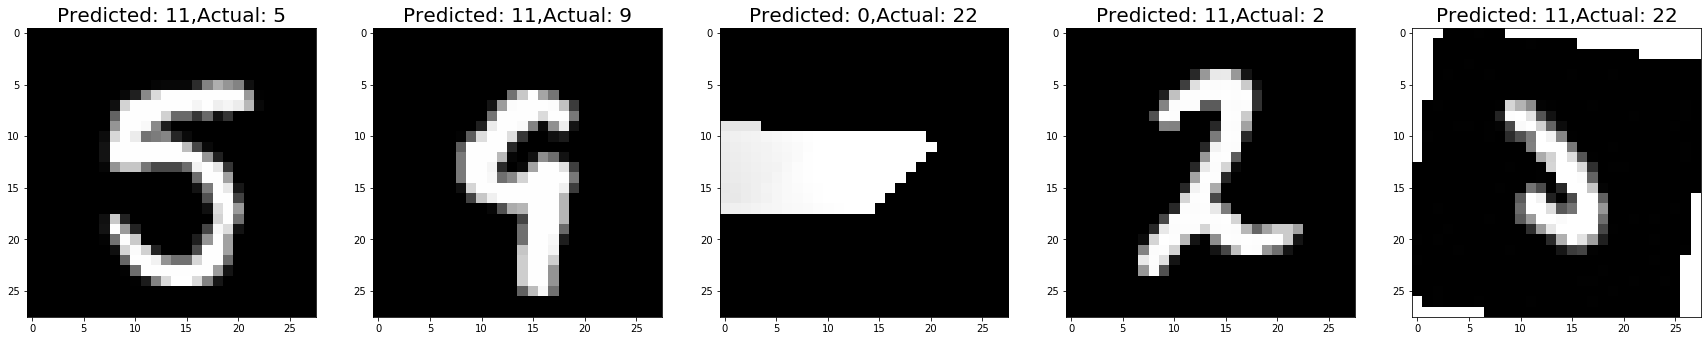

In [48]:
plt.figure(figsize = (30,10))
X_test = np.array(X_test)
for plotIndex, wrong in enumerate(misclassifiedIndex[0:5]):
    plt.subplot(1,5,plotIndex + 1)
    plt.imshow(X_test[wrong], cmap = plt.cm.gray)
    plt.title('Predicted: {},Actual: {}'.format(y_pred[wrong],y_test[wrong]),fontsize = 20)